## NPC Real Estate EDA
### By Victory Okechukwu

### Introduction

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading the dataset
df = pd.read_csv('Real_estate_clean.csv')

In [3]:
# Checking the dataframe
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [4]:
# Checking Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          4912 non-null   object
 1   Price         4912 non-null   int64 
 2   Location      4912 non-null   object
 3   Bedroom       4912 non-null   int64 
 4   PropertyType  4912 non-null   object
dtypes: int64(2), object(3)
memory usage: 192.0+ KB


### Preliminary cleaning

In [5]:
# Changing datatype of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4912 non-null   datetime64[ns]
 1   Price         4912 non-null   int64         
 2   Location      4912 non-null   object        
 3   Bedroom       4912 non-null   int64         
 4   PropertyType  4912 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 192.0+ KB


In [6]:
# House at jabi for N35,000 is too low
df.iloc[4162:4165]

,Date,Price,Location,Bedroom,PropertyType
4162,2022-02-03,37000000,Life Camp,3,house
4163,2022-02-02,35000,Jabi,1,detached duplex
4164,2022-02-02,190000000,Guzape District,6,detached duplex


In [7]:
# Dropping the jabi entry
df = df.drop(index=4163)
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [8]:
# Dropping entries above 4 billion overall and above 1 billion except in some districts 
df = df.drop(index=df[df['Price'] > 4e+9].index)
df = df.drop(index=df[~df['Location'].isin(['Asokoro District','Maitama District','Guzape District','Wuse 2'])
                & (df['Price'] > 1e+9)].index)

# Dropping entries with property type of block of flats and houses
df = df.drop(index=df[(df['PropertyType'].isin(['block of flats','house']))].index).reset_index(drop=True)

In [9]:
# Dropping entries with locations that have less than 10 entries
locations = df['Location'].value_counts().to_frame()[df['Location']
            .value_counts().to_frame()['Location'] > 10].index.values.tolist()
df = df[df['Location'].isin(locations)]
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex
3,2022-05-19,55000000,Kubwa,5,detached duplex
4,2021-10-13,34500000,Kubwa,3,terraced duplex


In [10]:
# Dividing property types into two types
df['PropertyType1'] = df['PropertyType'].str.split(' ',expand=True)[0]
df['PropertyType2'] = df['PropertyType'].str.split(' ',expand=True)[1]
df= df.drop(axis=1,columns='PropertyType')
df.head()

,Date,Price,Location,Bedroom,PropertyType1,PropertyType2
0,2021-08-21,42500000,Kaura,4,terraced,duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced,duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached,duplex
3,2022-05-19,55000000,Kubwa,5,detached,duplex
4,2021-10-13,34500000,Kubwa,3,terraced,duplex


In [11]:
# Checking for duplicated entries
df[df.duplicated()].shape

(46, 6)

In [12]:
# Dropping duplicated entries
df = df.drop_duplicates(ignore_index=True)

In [13]:
# Checking for duplicated entries
df[df.duplicated()].shape

(0, 6)

### Univariate Exploration

#### Location

In [14]:
# Checking statistics of main variable
df['Location'].describe()

count                4074
unique                 31
top       Guzape District
freq                  483
Name: Location, dtype: object

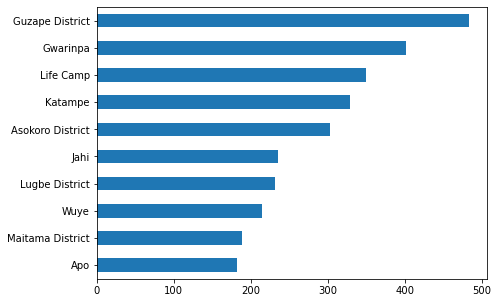

In [15]:
# Plotting counts of houses for sale in different locations
plt.figure(figsize=[7,5])
df['Location'].value_counts().head(10).plot(kind='barh').invert_yaxis()

#### Price

In [16]:
# Checking statistics of price
df['Price'].describe()

count    4.074000e+03
mean     2.404762e+08
std      3.509509e+08
min      6.000000e+06
25%      7.000000e+07
50%      1.200000e+08
75%      2.500000e+08
max      4.000000e+09
Name: Price, dtype: float64

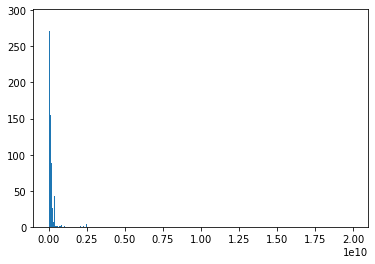

In [17]:
# Ploting price of houses in abuja
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins);

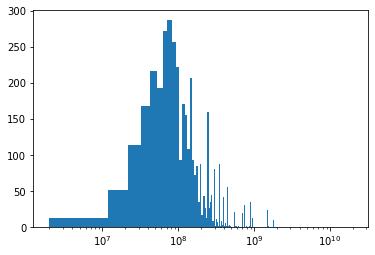

In [18]:
# Ploting price of houses in abuja with log scale
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins)
plt.xscale('log');

#### Property Types

In [19]:
# Defining a function for plotting barchart
def ploty(x):
    df[x].value_counts().head(10).plot(kind='bar')
    plt.title('Count of {}'.format(x))
    plt.xlabel('Count')
    plt.ylabel(x)
    plt.xticks(rotation=0)

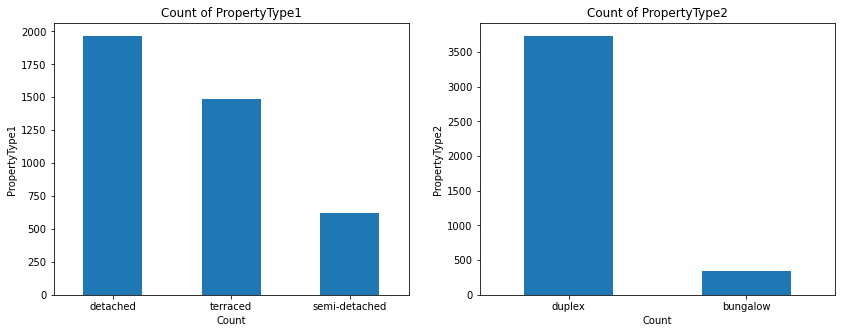

In [20]:
# Plotting barchart for count of Property types
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
ploty(x='PropertyType1')
plt.subplot(1,2,2)
ploty(x='PropertyType2')

#### Bedroom

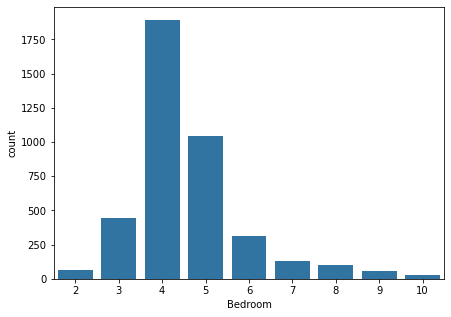

In [21]:
# Plotting of barchart for count of bedrooms
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df, x='Bedroom',color=base_color);

#### Date

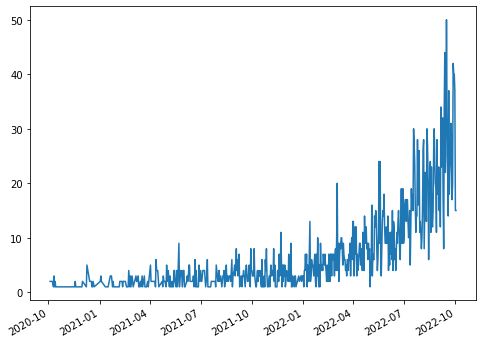

In [22]:
# plotting time series of bedroom counts
plt.figure(figsize=[8,6])
df['Date'].value_counts().plot(kind='line');

### Bivariate Exploration

In [23]:
# Checking dataframe
df.head()

,Date,Price,Location,Bedroom,PropertyType1,PropertyType2
0,2021-08-21,42500000,Kaura,4,terraced,duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced,duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached,duplex
3,2022-05-19,55000000,Kubwa,5,detached,duplex
4,2021-10-13,34500000,Kubwa,3,terraced,duplex


#### Location and Price

In [24]:
# Top 10 locations with expensive houses
Top_10 = df.groupby('Location').mean().sort_values('Price',ascending=False).head(10)['Price']
Top_10

Location
Maitama District    8.815185e+08
Asokoro District    6.818845e+08
Wuse 2              4.088333e+08
Guzape District     3.206932e+08
Katampe             2.976736e+08
Jabi                2.358750e+08
Wuse                2.304082e+08
Utako               1.875000e+08
Wuye                1.826774e+08
Kado                1.770513e+08
Name: Price, dtype: float64

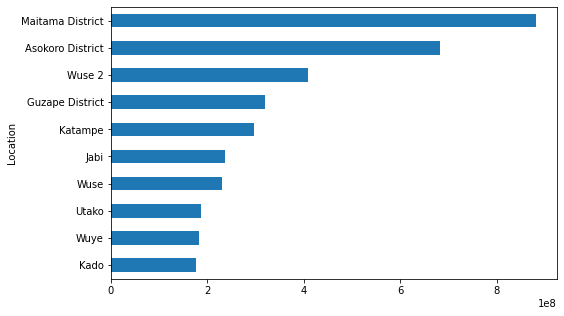

In [25]:
# Plotting top 10  locations with expensive houses 
plt.figure(figsize=[8,5])
Top_10.plot(kind='barh')
plt.gca().invert_yaxis()

#### Location and Property types

In [26]:
# Top 10 locations with highest housing vacancies
df['Location'].value_counts().head(10).index.values

array(['Guzape District', 'Gwarinpa', 'Life Camp', 'Katampe',
       'Asokoro District', 'Jahi', 'Lugbe District', 'Wuye',
       'Maitama District', 'Apo'], dtype=object)

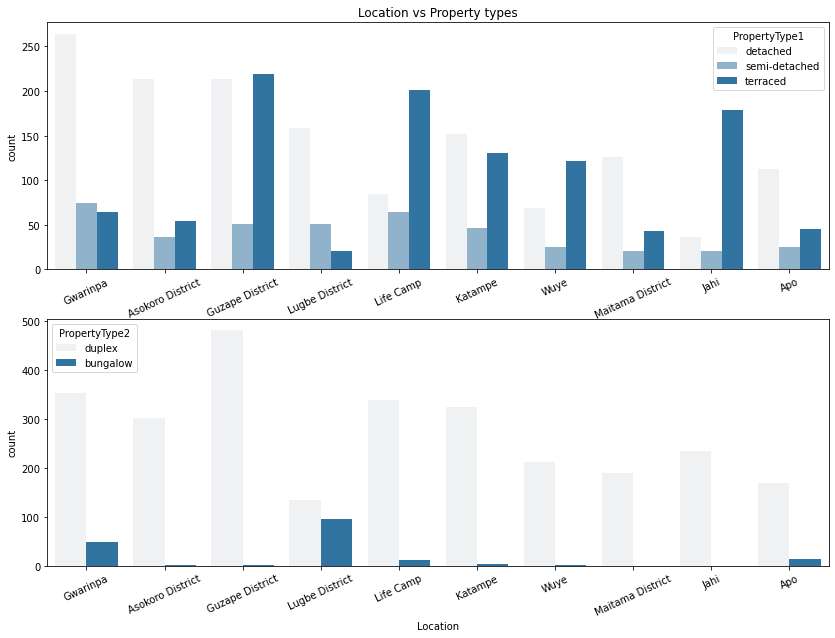

In [27]:
# Plotting counts of houses for sale in according to locations and property types
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,10])
plt.subplot(2,1,1)
top_10 = df[df['Location'].isin(df['Location'].value_counts().head(10).index.values)]
sb.countplot(data=top_10,x='Location',hue='PropertyType1',
             hue_order=['detached','semi-detached','terraced'],color=base_color)
plt.xticks(rotation=25)
plt.title('Location vs Property types')
plt.subplot(2,1,2)
sb.countplot(data=top_10,x='Location',hue='PropertyType2', color=base_color)
plt.xticks(rotation=25);

#### Location and bedroom

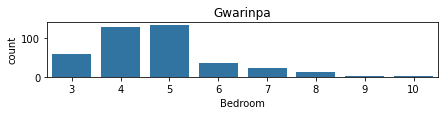

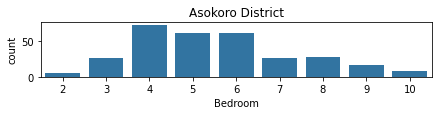

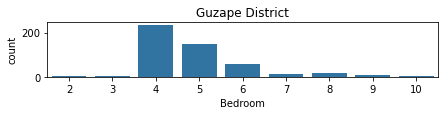

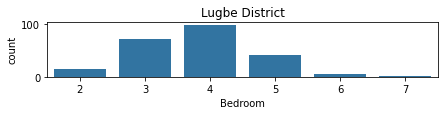

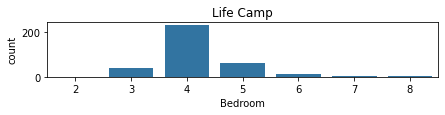

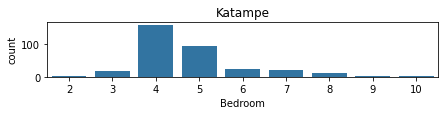

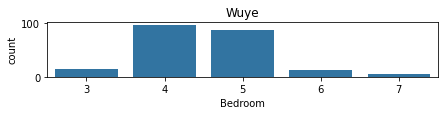

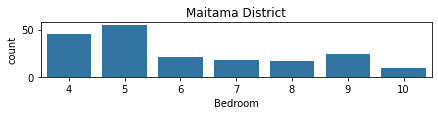

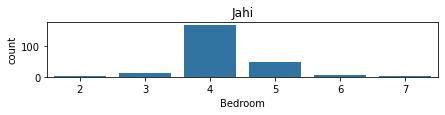

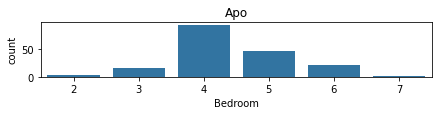

In [28]:
# Looping a barchart plot across top 10 locations
for i in top_10['Location'].unique():
    used_df = top_10[top_10['Location'] == i]
    plt.subplots(figsize=[7,1])
    plt.title(i)
    sb.countplot(data=used_df,x='Bedroom',color=base_color);

#### Date and Price

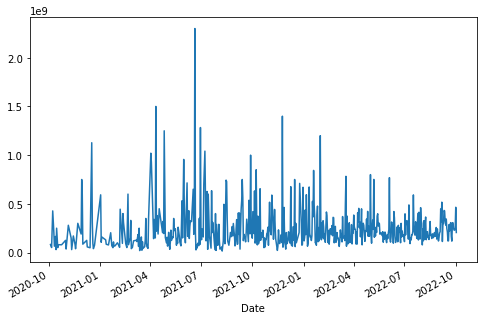

In [29]:
# Plotting Time series of average prices across dates
plt.figure(figsize=[8,5])
df.groupby(df['Date']).mean()['Price'].plot(kind='line');

### Multivariate Exploration

#### Location, Price and Date

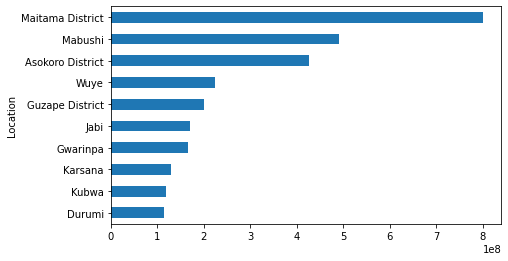

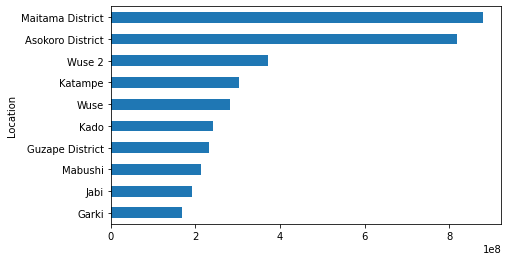

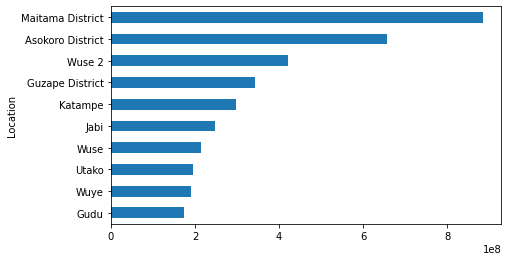

In [34]:
df_2020 = df[df['Date'].dt.year == 2020]
df_2021 = df[df['Date'].dt.year == 2021]
df_2022 = df[df['Date'].dt.year == 2022]
for i in [df_2020,df_2021,df_2022]:  
    plt.subplots(figsize=[7,4])
    i.groupby('Location').mean().sort_values('Price',
                                             ascending=False).head(10)['Price'].plot(kind='barh').invert_yaxis()

#### Location, Price and Bedroom

#### Location, Price and Property types